In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [2]:
td_root = 'out.csv'
od_root = 'final_output.csv'

td_list =  []
od_list =  []

In [3]:
with open(td_root, newline='') as csvfile:
  td = pd.read_csv(td_root)

In [4]:
td

,Post Index,followers,upload time,Like Count,Comment Count,is Photo,is Video,hashtag,Pic Description,days_diff,hashtag_count
0,0,667000,2024-10-17 07:41:22,3141000.0,192,0,1,"['#polarbear', '#icecream', '#aiart', '#artcom...",NaN,38.0,10
1,1,13000,2024-10-23 13:45:06,203.0,0,0,1,"['#酥炸雞排', '#酥炸蝦排', '#花蓮', '#花蓮市', '#花蓮美食', '#花...",NaN,32.0,13
2,2,12000,2024-11-02 09:12:56,6817.0,0,1,0,"['#迷因', '#梗圖', '#迷因梗', '#迷因梗圖', '#memes', '#梗圖...",2 個人和顯示的文字是「 Muti 製圖/葉力琦 你要我刻在你心裡 還是墓碑上？ 」的圖像.,22.0,16
3,3,18000,2024-10-17 10:00:40,703.0,0,0,1,"['#花蓮美食', '#花蓮點心', '#花蓮下午茶', '#復興街石頭餅', '#石頭餅'...",NaN,38.0,9
4,4,338000,2024-11-10 09:02:34,32000.0,168,0,1,[],NaN,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...
9703,352,83,2024-11-21 11:00:00,60.0,241,0,1,"['#VALORANT', '#Capnhat']",NaN,3.0,2
9704,353,8,2024-11-19 23:30:52,4.0,71,1,0,[],1 人、新聞中心和文字的圖像.,5.0,0
9705,354,313,2024-11-20 08:34:20,1.0,0,1,0,[],3 個人、瀏海和文字的圖像.,4.0,0
9706,355,25,2024-11-19 00:03:02,2.0,48,1,0,[],1 人、海報和文字的電玩遊戲截圖.,5.0,0


In [5]:
td_pic = td[td["is Photo"] == 1]
td_vid = td[td["is Video"] == 1]

In [6]:
td_pic

,Post Index,followers,upload time,Like Count,Comment Count,is Photo,is Video,hashtag,Pic Description,days_diff,hashtag_count
2,2,12000,2024-11-02 09:12:56,6817.0,0,1,0,"['#迷因', '#梗圖', '#迷因梗', '#迷因梗圖', '#memes', '#梗圖...",2 個人和顯示的文字是「 Muti 製圖/葉力琦 你要我刻在你心裡 還是墓碑上？ 」的圖像.,22.0,16
11,1,102000,2024-10-14 00:18:05,4905.0,0,1,0,[],5 個人和圍裙的圖像.,41.0,0
13,3,12000,2024-11-02 09:12:56,6887.0,0,1,0,"['#迷因', '#梗圖', '#迷因梗', '#迷因梗圖', '#memes', '#梗圖...",2 個人和顯示的文字是「 Muti 製圖/葉力琦 你要我刻在你心裡 還是墓碑上？ 」的圖像.,22.0,16
17,7,30000,2024-11-08 10:18:17,4174.0,0,1,0,"['#lowiq01', '#lowiq01andtherhythmmakersplus',...",2 個人、毛髮、連帽風衣、上衣和文字的圖像.,16.0,5
27,1,2348000,2024-11-11 18:56:50,16000.0,0,1,0,"['#BikoStar', '#MannaHero', '#TauLion', '#BKMN...",1 人的圖像.,13.0,6
...,...,...,...,...,...,...,...,...,...,...,...
9701,350,1,2024-10-18 11:16:01,24.0,25,1,0,"['#lolesports', '#esports', '#leagueoflegends'...",1 人和文字的電玩遊戲截圖.,37.0,4
9704,353,8,2024-11-19 23:30:52,4.0,71,1,0,[],1 人、新聞中心和文字的圖像.,5.0,0
9705,354,313,2024-11-20 08:34:20,1.0,0,1,0,[],3 個人、瀏海和文字的圖像.,4.0,0
9706,355,25,2024-11-19 00:03:02,2.0,48,1,0,[],1 人、海報和文字的電玩遊戲截圖.,5.0,0


In [7]:
td_vid

,Post Index,followers,upload time,Like Count,Comment Count,is Photo,is Video,hashtag,Pic Description,days_diff,hashtag_count
0,0,667000,2024-10-17 07:41:22,3141000.0,192,0,1,"['#polarbear', '#icecream', '#aiart', '#artcom...",NaN,38.0,10
1,1,13000,2024-10-23 13:45:06,203.0,0,0,1,"['#酥炸雞排', '#酥炸蝦排', '#花蓮', '#花蓮市', '#花蓮美食', '#花...",NaN,32.0,13
3,3,18000,2024-10-17 10:00:40,703.0,0,0,1,"['#花蓮美食', '#花蓮點心', '#花蓮下午茶', '#復興街石頭餅', '#石頭餅'...",NaN,38.0,9
4,4,338000,2024-11-10 09:02:34,32000.0,168,0,1,[],NaN,14.0,0
5,5,868000,2024-11-06 14:01:17,59000.0,228,0,1,"['#Girhein', '#GeoEntertainment', '#HarPalGeo'...",NaN,18.0,13
...,...,...,...,...,...,...,...,...,...,...,...
9689,338,117,2024-10-02 04:19:13,43.0,160,0,1,"['#大胃王', '#大胃王挑戰', '#吃到飽', '#牛肉', '#牛排', '#buf...",NaN,53.0,16
9693,342,85,2024-10-18 03:00:28,94.0,241,0,1,"['#trending', '#domino', '#viral', '#foryou', ...",NaN,37.0,13
9698,347,932,2024-11-06 11:32:22,24.0,47,0,1,"['#carpetgrooming', '#rugbrushing', '#asmrsoun...",NaN,18.0,21
9702,351,21,2024-11-21 15:15:23,8.0,43,0,1,"['#T1', '#DORAN', '#도란', '#우리탑', '#첫방송']",NaN,3.0,5


In [8]:
td_pic = td_pic.drop(['Post Index', 'upload time', 'hashtag', 'is Photo', 'is Video', 'Pic Description'], axis=1)
td_vid = td_vid.drop(['Post Index', 'upload time', 'hashtag', 'is Photo', 'is Video', 'Pic Description'], axis=1)
td_pic = td_pic.dropna(axis = 0)
td_vid = td_vid.dropna(axis = 0)
td_pic = td_pic.loc[:, ['followers', 'days_diff', 'hashtag_count', 'Comment Count', 'Like Count']]
td_vid = td_vid.loc[:, ['followers', 'days_diff', 'hashtag_count', 'Comment Count', 'Like Count']]

In [9]:
td_pic

,followers,days_diff,hashtag_count,Comment Count,Like Count
2,12000,22.0,16,0,6817.0
11,102000,41.0,0,0,4905.0
13,12000,22.0,16,0,6887.0
17,30000,16.0,5,0,4174.0
27,2348000,13.0,6,0,16000.0
...,...,...,...,...,...
9701,1,37.0,4,25,24.0
9704,8,5.0,0,71,4.0
9705,313,4.0,0,0,1.0
9706,25,5.0,0,48,2.0


In [10]:
td_vid

,followers,days_diff,hashtag_count,Comment Count,Like Count
0,667000,38.0,10,192,3141000.0
1,13000,32.0,13,0,203.0
3,18000,38.0,9,0,703.0
4,338000,14.0,0,168,32000.0
5,868000,18.0,13,228,59000.0
...,...,...,...,...,...
9689,117,53.0,16,160,43.0
9693,85,37.0,13,241,94.0
9698,932,18.0,21,47,24.0
9702,21,3.0,5,43,8.0


In [11]:
def to_log(dataset):
    for i in range(dataset.shape[1]):
        dataset[:, i] = np.where(dataset[:, i] > 0, np.log10(dataset[:, i].clip(min=1e-10)), dataset[:, i])

    return dataset

In [12]:
td_pic = td_pic.to_numpy()
td_vid = td_vid.to_numpy()
td_pic = to_log(td_pic)
td_vid = to_log(td_vid)

In [13]:
def z_score(dataset):
    z_scores = np.abs(zscore(dataset))
    threshold = 2
    filtered_data = dataset[(z_scores < threshold).all(axis=1)]

    return filtered_data

In [16]:
def iqr(dataset):
    Q1 = np.percentile(dataset, 25, axis=0)
    Q3 = np.percentile(dataset, 75, axis=0)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = dataset[
        ~((dataset < lower_bound) | (dataset > upper_bound)).any(axis=1)
    ]

    return filtered_data

In [14]:
td_pic

array([[4.07918125, 1.34242268, 1.20411998, 0.        , 3.83359329],
       [5.00860017, 1.61278386, 0.        , 0.        , 3.69063901],
       [4.07918125, 1.34242268, 1.20411998, 0.        , 3.83803008],
       ...,
       [2.49554434, 0.60205999, 0.        , 0.        , 0.        ],
       [1.39794001, 0.69897   , 0.        , 1.68124124, 0.30103   ],
       [0.95424251, 1.66275783, 0.        , 0.47712125, 0.47712125]])

In [15]:
td_vid

array([[5.82412583, 1.5797836 , 1.        , 2.28330123, 6.49706794],
       [4.11394335, 1.50514998, 1.11394335, 0.        , 2.30749604],
       [4.25527251, 1.5797836 , 0.95424251, 0.        , 2.84695533],
       ...,
       [2.96941591, 1.25527251, 1.32221929, 1.67209786, 1.38021124],
       [1.32221929, 0.47712125, 0.69897   , 1.63346846, 0.90308999],
       [1.91907809, 0.47712125, 0.30103   , 2.38201704, 1.77815125]])

In [17]:
td_pic = z_score(td_pic)
td_vid = z_score(td_vid)

In [35]:
td_pic_try1 = []
for i in range(3, 6):
    td_pic_try1.append(td_pic[td_pic[:, 0] > i])
    td_pic_try1[len(td_pic_try1) - 1] = td_pic_try1[len(td_pic_try1) - 1][td_pic_try1[len(td_pic_try1) - 1][:, 0] <= (i+1)]
    # print(len(td_pic_try1[len(td_pic_try1) - 1]))

td_pic_try2 = []
for i in range(2, 5):
    td_pic_try2.append(td_pic[td_pic[:, 0] > i])
    td_pic_try2[len(td_pic_try2) - 1] = td_pic_try2[len(td_pic_try2) - 1][td_pic_try2[len(td_pic_try2) - 1][:, 0] <= (i+2)]
    # print(len(td_pic_try2[len(td_pic_try2) - 1]))

td_pic_try3 = []
for i in range(1, 4):
    td_pic_try3.append(td_pic[td_pic[:, 0] > i])
    td_pic_try3[len(td_pic_try3) - 1] = td_pic_try3[len(td_pic_try3) - 1][td_pic_try3[len(td_pic_try3) - 1][:, 0] <= (i+3)]
    # print(len(td_pic_try3[len(td_pic_try3) - 1]))

td_pic_try1_5 = []
for i in range(3, 6):
    td_pic_try1_5.append(td_pic[td_pic[:, 0] > (i-0.5)])
    td_pic_try1_5[len(td_pic_try1_5) - 1] = td_pic_try1_5[len(td_pic_try1_5) - 1][td_pic_try1_5[len(td_pic_try1_5) - 1][:, 0] <= (i+0.5)]
    # print(len(td_pic_try1_5[len(td_pic_try1_5) - 1]))

td_pic_try2_5 = []
for i in range(2, 5):
    td_pic_try2_5.append(td_pic[td_pic[:, 0] > (i-0.5)])
    td_pic_try2_5[len(td_pic_try2_5) - 1] = td_pic_try2_5[len(td_pic_try2_5) - 1][td_pic_try2_5[len(td_pic_try2_5) - 1][:, 0] <= (i+1.5)]
    # print(len(td_pic_try2_5[len(td_pic_try2_5) - 1]))

td_pic_try3_5 = []
for i in range(1, 4):
    td_pic_try3_5.append(td_pic[td_pic[:, 0] > (i-0.5)])
    td_pic_try3_5[len(td_pic_try3_5) - 1] = td_pic_try3_5[len(td_pic_try3_5) - 1][td_pic_try3_5[len(td_pic_try3_5) - 1][:, 0] <= (i+2.5)]
    # print(len(td_pic_try3_5[len(td_pic_try3_5) - 1]))

td_pic_try = td_pic_try1 + td_pic_try2 + td_pic_try3 + td_pic_try1_5 + td_pic_try2_5 + td_pic_try3_5
print("pic lengths: ")
for i in range(len(td_pic_try)):
    print(len(td_pic_try[i]), end = ", ")
    if i % 6 == 5:
        print()

td_vid_try1 = []
for i in range(3, 6):
    td_vid_try1.append(td_vid[td_vid[:, 0] > i])
    td_vid_try1[len(td_vid_try1) - 1] = td_vid_try1[len(td_vid_try1) - 1][td_vid_try1[len(td_vid_try1) - 1][:, 0] <= (i+1)]
    # print(len(td_vid_try1[len(td_vid_try1) - 1]))

td_vid_try2 = []
for i in range(2, 5):
    td_vid_try2.append(td_vid[td_vid[:, 0] > i])
    td_vid_try2[len(td_vid_try2) - 1] = td_vid_try2[len(td_vid_try2) - 1][td_vid_try2[len(td_vid_try2) - 1][:, 0] <= (i+2)]
    # print(len(td_vid_try2[len(td_vid_try2) - 1]))

td_vid_try3 = []
for i in range(1, 4):
    td_vid_try3.append(td_vid[td_vid[:, 0] > i])
    td_vid_try3[len(td_vid_try3) - 1] = td_vid_try3[len(td_vid_try3) - 1][td_vid_try3[len(td_vid_try3) - 1][:, 0] <= (i+3)]
    # print(len(td_vid_try3[len(td_vid_try3) - 1]))

td_vid_try1_5 = []
for i in range(3, 6):
    td_vid_try1_5.append(td_vid[td_vid[:, 0] > (i-0.5)])
    td_vid_try1_5[len(td_vid_try1_5) - 1] = td_vid_try1_5[len(td_vid_try1_5) - 1][td_vid_try1_5[len(td_vid_try1_5) - 1][:, 0] <= (i+0.5)]
    # print(len(td_vid_try1_5[len(td_vid_try1_5) - 1]))

td_vid_try2_5 = []
for i in range(2, 5):
    td_vid_try2_5.append(td_vid[td_vid[:, 0] > (i-0.5)])
    td_vid_try2_5[len(td_vid_try2_5) - 1] = td_vid_try2_5[len(td_vid_try2_5) - 1][td_vid_try2_5[len(td_vid_try2_5) - 1][:, 0] <= (i+1.5)]
    # print(len(td_vid_try2_5[len(td_vid_try2_5) - 1]))

td_vid_try3_5 = []
for i in range(1, 4):
    td_vid_try3_5.append(td_vid[td_vid[:, 0] > (i-0.5)])
    td_vid_try3_5[len(td_vid_try3_5) - 1] = td_vid_try3_5[len(td_vid_try3_5) - 1][td_vid_try3_5[len(td_vid_try3_5) - 1][:, 0] <= (i+2.5)]
    # print(len(td_vid_try3_5[len(td_vid_try3_5) - 1]))

td_vid_try = td_vid_try1 + td_vid_try2 + td_vid_try3 + td_vid_try1_5 + td_vid_try2_5 + td_vid_try3_5
print("vid lengths: ")
for i in range(len(td_vid_try)):
    print(len(td_vid_try[i]), end = ", ")
    if i % 6 == 5:
        print()

pic lengths: 
159, 1049, 763, 554, 1208, 1812, 
1083, 1603, 1971, 229, 634, 1078, 
720, 863, 1712, 1170, 1354, 1941, 
vid lengths: 
340, 1009, 1182, 1088, 1349, 2191, 
1960, 2097, 2531, 420, 674, 1335, 
1346, 1094, 2009, 2044, 2020, 2429, 


In [38]:
def SplitData(data, split_ratio):
    training_data = []
    validation_data = []
    training_data = data[:int(len(data)*split_ratio)]
    validation_data = data[int(len(data)*split_ratio):]

    return training_data, validation_data

In [133]:
pic_cnt = 0
vid_cnt = 0
pic_MAPEs = []
vid_MAPEs = []

In [143]:
def Regression(dataset):
    X = dataset[:, :4]
    y = dataset[:, 4]
    degree = 1  # quadratic regression

    # Add polynomial features to X
    X_poly = np.ones((X.shape[0], 1))  # Add intercept term (column of ones)
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))  # Add x^d terms to feature matrix

    # Initialize coefficients (weights) to zero
    num_dimensions = X_poly.shape[1]  # Number of features (including intercept and polynomial terms)
    # w = np.zeros(num_dimensions)
    w = np.full(num_dimensions, 0.05)

    num_iteration = 100000
    learning_rate = 0.0001

    # Gradient Descent
    m = len(y)  # Number of data points
    for iteration in range(num_iteration):
        # TODO: Prediction using current weights and compute error
        y_pre = (w.T @ X_poly.T)
        cost = ((y-y_pre)**2)
        error = cost.sum()/len(y)

        # TODO: Compute gradient
        w_grad = (X_poly.T*(y_pre - y)).mean(axis=1)

        # TODO: Update the weights
        w = w - w_grad * learning_rate

        # TODO: Optionally, print the cost every 100 iterations
        if iteration % 10000 == 0 or iteration == num_iteration-1:
            print(f"Iteration {iteration}, Cost: {error}, y_pre: {y_pre.mean()}, error: {error}")

    return w

In [43]:
def MakePrediction(w, test_dataset):
    prediction = []
    X = test_dataset[:, :4]
    tmp = w[1:]
    prediction = w[0] + (tmp*X).sum(axis=1)

    return np.array(prediction)

In [210]:
td_pic_train = td_pic_try[pic_cnt]
pic_cnt+=1
pic_train_datalist, pic_val_datalist = SplitData(td_pic_train, 0.8)
print(pic_train_datalist.shape[0])
print(pic_val_datalist.shape[0])

td_vid_train = td_vid_try[vid_cnt]
vid_cnt+=1
vid_train_datalist, vid_val_datalist = SplitData(td_vid_train, 0.8)
print(vid_train_datalist.shape[0])
print(vid_val_datalist.shape[0])

1552
389
1943
486


In [204]:
w_pic = Regression(pic_train_datalist)
w_vid = Regression(vid_train_datalist)

Iteration 0, Cost: 8.334441344779318, y_pre: 0.4092756724258238, error: 8.334441344779318
Iteration 10000, Cost: 0.6116713121399646, y_pre: 3.142008250183603, error: 0.6116713121399646
Iteration 20000, Cost: 0.5917176506491473, y_pre: 3.137687610272042, error: 0.5917176506491473
Iteration 30000, Cost: 0.5848789273542935, y_pre: 3.135028917513433, error: 0.5848789273542935
Iteration 40000, Cost: 0.582401684397439, y_pre: 3.1333399782287885, error: 0.582401684397439
Iteration 50000, Cost: 0.581399113414328, y_pre: 3.1322222809790423, error: 0.581399113414328
Iteration 60000, Cost: 0.5809147671452062, y_pre: 3.131445865981849, error: 0.5809147671452062
Iteration 70000, Cost: 0.5806281640766418, y_pre: 3.1308775612290365, error: 0.5806281640766418
Iteration 80000, Cost: 0.5804289982559487, y_pre: 3.1304398198275023, error: 0.5804289982559487
Iteration 90000, Cost: 0.5802769570400766, y_pre: 3.1300871050663184, error: 0.5802769570400766
Iteration 99999, Cost: 0.5801554828823581, y_pre: 3.12

In [205]:
# (4) Predict validation dataset's answer, calculate MAPE comparing to the ground truth
print(w_pic)
tmp = w_pic[1:]
print(tmp)
pic_val_datalist = pic_val_datalist[~np.isnan(pic_val_datalist).any(axis=1)]
prediction = MakePrediction(w_pic, pic_val_datalist)
# print(prediction)

p, v = prediction.mean(), pic_val_datalist[:, 4].mean()
print(p, v)
pic_MAPE = abs(p - v)/v*100
print(pic_MAPE)

# (4) Predict validation dataset's answer, calculate MAPE comparing to the ground truth
print(w_vid)
tmp = w_vid[1:]
print(tmp)
vid_val_datalist = vid_val_datalist[~np.isnan(vid_val_datalist).any(axis=1)]
prediction = MakePrediction(w_vid, pic_val_datalist)
# print(prediction)

p, v = prediction.mean(), vid_val_datalist[:, 4].mean()
print(p, v)
vid_MAPE = abs(p - v)/v*100
print(vid_MAPE)

[0.07986302 0.55349692 0.05496398 0.07073853 0.53046617]
[0.55349692 0.05496398 0.07073853 0.53046617]
2.5584881981515815 2.38558113139143
7.248006135062806
[0.17940238 0.53012143 0.23659536 0.12561547 0.53415791]
[0.53012143 0.23659536 0.12561547 0.53415791]
2.801525134652778 3.1896470814213154
12.168178386543914


In [206]:
pic_MAPEs.append(pic_MAPE)
print(pic_MAPEs)
vid_MAPEs.append(vid_MAPE)
print(vid_MAPEs)

[24.3741192976485, 13.808829106838171, 1.5439806385539596, 2.8028409424984466, 10.497773085108697, 3.184320680848893, 43.178034137004126, 23.494345020001905, 0.9425545014318977, 43.909298818572424, 15.288254892438083, 0.7281093849404804, 27.328430070848814, 8.621229737937455, 3.149214876665411, 66.35667266817869, 9.679417889246889, 7.248006135062806]
[16.29417582448544, 27.522879509630478, 25.706218853479136, 53.83325621369362, 26.271964774258468, 32.07297947732227, 36.23894528112169, 56.73569392905464, 31.66421761401591, 16.50963935675551, 27.09260012075741, 22.70968432343771, 21.509640516806776, 21.98352570181603, 28.97175475803646, 4.115466614620047, 26.40128183514458, 12.168178386543914]


In [211]:
print(min(pic_MAPEs))
print(min(vid_MAPEs))

0.7281093849404804
4.115466614620047


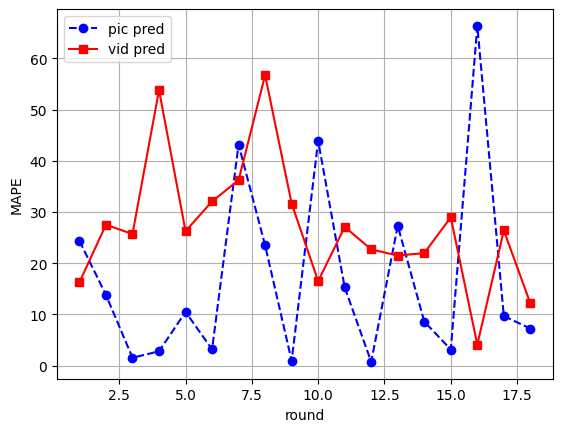

In [212]:
x = []
for i in range(len(td_pic_try)):
    x.append(i+1)
y1 = pic_MAPEs
y2 = vid_MAPEs

plt.plot(x, y1, linestyle='--', marker='o', color='b', label='pic pred')
plt.plot(x, y2, linestyle='-', marker='s', color='r', label='vid pred')

# 添加图例和标签
plt.xlabel('round')
plt.ylabel('MAPE')
plt.legend()

plt.grid(True)
plt.show()